# Interchanging unencrypted model with encrypted layer 

# NMNIST (Verify Encryption correctness)

In [1]:
import torch
import sys
sys.path.append('../quantization_utils')

from _Loading_All_Model import *
from _Loading_All_Dataloader import * 
from quantization import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Current device is {device}!!")

weight_path = '../pretrained_weights_float32/encrypted_128samples_nmnist.t7'
model = NMNIST_model(T_BIN=15).to(device)
checkpoint = torch.load(weight_path,map_location=device)
model.load_state_dict(checkpoint['net'])

_ , test_loader = choose_dataset(target="NMNIST",batch_size=16,T_BIN=15,dataset_path='/home/edwin/code/dataset/')
    
print(f"Encrypted mode Acc: {check_accuracy(test_loader,model)*100}% Accuracy")

/home/edwin/anaconda3/envs/SNN_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Current device is cuda!!
Checking on testing data
Got 1715/10000 with accuracy 17.15
Encrypted mode Acc: 17.149999618530273% Accuracy


In [2]:
weight_path = '../pretrained_weights_float32/pre_trained_normal-nmnist_snn_300e.t7'
model_new = NMNIST_model(T_BIN=15).to(device)
checkpoint = torch.load(weight_path,map_location=device)
model_new.load_state_dict(checkpoint['net'])
quantize_weights_nbits(model_new,8)

print(f"Float32 model quantized to 8bit Acc: {check_accuracy(test_loader,model_new)*100}% Accuracy")

The current layer is: fc1: 
finished quantized fc1 weights to 8 BITs
The current layer is: fc2: 
finished quantized fc2 weights to 8 BITs
Checking on testing data
Got 9795/10000 with accuracy 97.95
Float32 model quantized to 8bit Acc: 97.94999694824219% Accuracy


In [3]:
model.fc2.weight.data

tensor([[-0.1289, -0.2891,  0.0508,  ..., -0.0781,  0.2070, -0.2188],
        [-0.1250, -0.1484,  0.1680,  ..., -0.1992,  0.3906,  0.0977],
        [-0.0312,  0.0469, -0.0977,  ...,  0.0312,  0.2773,  0.1719],
        ...,
        [-0.1250, -0.0938,  0.1484,  ...,  0.1211,  0.2109,  0.1016],
        [-0.2852, -0.2695, -0.1016,  ...,  0.0391,  0.2539,  0.2422],
        [ 0.1367,  0.2773, -0.3672,  ..., -0.2031,  0.1914, -0.0977]],
       device='cuda:0')

In [4]:
model_new.fc2.weight.data

tensor([[-0.1289, -0.2891,  0.0508,  ..., -0.0781,  0.2070, -0.2188],
        [-0.1250, -0.1484,  0.1680,  ..., -0.1992,  0.3906,  0.0977],
        [-0.0312,  0.0469, -0.0977,  ...,  0.0312,  0.2773,  0.1719],
        ...,
        [-0.1250, -0.0938,  0.1484,  ...,  0.1211,  0.2109,  0.1016],
        [-0.2852, -0.2695, -0.1016,  ...,  0.0391,  0.2539,  0.2422],
        [ 0.1367,  0.2773, -0.3672,  ..., -0.2031,  0.1914, -0.0977]],
       device='cuda:0')

In [5]:
(model.fc2.weight.data != model_new.fc2.weight.data).sum()

tensor(36, device='cuda:0')

# Cross Validation (NMNIST)

In [6]:
print(f"Encrypted model Acc: {check_accuracy(test_loader,model)*100}% Accuracy")
print(f"Float32 model quantized to 8bit Acc: {check_accuracy(test_loader,model_new)*100}% Accuracy")

Checking on testing data
Got 1715/10000 with accuracy 17.15
Encrypted model Acc: 17.149999618530273% Accuracy
Checking on testing data
Got 9795/10000 with accuracy 97.95
Float32 model quantized to 8bit Acc: 97.94999694824219% Accuracy


In [7]:
model.fc2.weight.data = model_new.fc2.weight.data 
print(f"Cross vaildate for recovered Encrypted model Acc: {check_accuracy(test_loader, model)*100}% Accuracy")

Checking on testing data
Got 9781/10000 with accuracy 97.81
Cross vaildate for recovered Encrypted model Acc: 97.80999755859375% Accuracy


# DVS128_Gesture (Verify Encryption correctness)

In [9]:
import torch
import sys
sys.path.append('../quantization_utils')

from _Loading_All_Model import *
from _Loading_All_Dataloader import * 
from quantization import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Current device is {device}!!")

weight_path = '../pretrained_weights_float32/encrypted_DVS128_Gesture_9(17).t7'
model = DVS128_model(T_BIN=15).to(device)
checkpoint = torch.load(weight_path,map_location=device)
model.load_state_dict(checkpoint['net'])

train_loader , test_loader = choose_dataset(target="DVS128_Gesture",batch_size=1,T_BIN=15,dataset_path='/home/edwin/code/dataset/')
    
print(f"Encrypted mode Acc: {check_accuracy(test_loader,model)*100}% Accuracy")

Current device is cuda!!
Checking on testing data
Got 24/264 with accuracy 9.09
Encrypted mode Acc: 9.090909004211426% Accuracy


In [11]:
weight_path = '../pretrained_weights_float32/pretrained_DVS_csnn_128e_91a.t7'
model_new = DVS128_model(T_BIN=15).to(device)
checkpoint = torch.load(weight_path,map_location=device)
model_new.load_state_dict(checkpoint['net'])
quantize_weights_nbits(model_new,8)

print(f"Float32 model quantized to 8bit Acc: {check_accuracy(test_loader,model_new)*100}% Accuracy")

The current layer is: conv0: 
finished quantized conv0 weights to 8 BITs
The current layer is: conv1: 
finished quantized conv1 weights to 8 BITs
The current layer is: conv2: 
finished quantized conv2 weights to 8 BITs
The current layer is: conv3: 
finished quantized conv3 weights to 8 BITs
The current layer is: fc1: 
finished quantized fc1 weights to 8 BITs
The current layer is: fc2: 
finished quantized fc2 weights to 8 BITs
Checking on testing data
Got 242/264 with accuracy 91.67
Float32 model quantized to 8bit Acc: 91.66667175292969% Accuracy


In [12]:
model.conv0.weight.data

tensor([[[[-0.0195, -0.0098, -0.0938],
          [ 0.0508, -0.1348, -0.0469],
          [ 0.0879,  0.2207,  0.0527]],

         [[-0.0801,  0.0195, -0.0293],
          [ 0.0898,  0.0254,  0.0898],
          [ 0.2207, -0.0957, -0.0039]]],


        [[[ 0.0547,  0.0000, -0.0156],
          [-0.2070, -0.2012,  0.2109],
          [ 0.2305, -0.2207, -0.1758]],

         [[ 0.2109, -0.2188,  0.1035],
          [ 0.1465,  0.1582,  0.1270],
          [ 0.0781,  0.0996, -0.1348]]],


        [[[ 0.2031, -0.0234,  0.1973],
          [ 0.0664,  0.1816,  0.1816],
          [-0.0469, -0.0684,  0.0332]],

         [[-0.0117,  0.0293,  0.1172],
          [-0.1875, -0.0137, -0.1875],
          [ 0.2266, -0.1660,  0.0410]]],


        ...,


        [[[-0.0566,  0.0469, -0.0488],
          [-0.0566, -0.0859,  0.1328],
          [-0.1562,  0.1445,  0.1367]],

         [[-0.0469,  0.2051,  0.1602],
          [ 0.0371,  0.2402,  0.0938],
          [-0.0605,  0.1758,  0.0977]]],


        [[[ 0.1328,  0.08

In [13]:
model_new.conv0.weight.data

tensor([[[[-0.0195, -0.0098, -0.0938],
          [ 0.0508, -0.1348, -0.0469],
          [ 0.0879,  0.2207,  0.0527]],

         [[-0.0801,  0.0195, -0.0293],
          [ 0.0898,  0.0254,  0.0898],
          [ 0.2207, -0.0957, -0.0039]]],


        [[[ 0.0547,  0.0000, -0.0156],
          [-0.2070, -0.2012, -0.2109],
          [-0.2305, -0.2207, -0.1758]],

         [[-0.2109, -0.2188,  0.1035],
          [ 0.1465,  0.1582,  0.1270],
          [ 0.0781,  0.0996, -0.1348]]],


        [[[ 0.2031, -0.0234,  0.1973],
          [ 0.0664,  0.1816,  0.1816],
          [-0.0469, -0.0684,  0.0332]],

         [[-0.0117,  0.0293,  0.1172],
          [-0.1875, -0.0137, -0.1875],
          [ 0.2266, -0.1660,  0.0410]]],


        ...,


        [[[-0.0566,  0.0469, -0.0488],
          [-0.0566, -0.0859,  0.1328],
          [-0.1562,  0.1445,  0.1367]],

         [[-0.0469,  0.2051,  0.1602],
          [ 0.0371,  0.2402,  0.0938],
          [-0.0605,  0.1758,  0.0977]]],


        [[[ 0.1328,  0.08

In [14]:
(model.conv0.weight.data != model_new.conv0.weight.data).sum()

tensor(17, device='cuda:0')

# Cross Validation (DVS128_Gesture)

In [15]:
print(f"Encrypted model Acc: {check_accuracy(test_loader,model)*100}% Accuracy")
print(f"Float32 model quantized to 8bit Acc: {check_accuracy(test_loader,model_new)*100}% Accuracy")

Checking on testing data
Got 24/264 with accuracy 9.09
Encrypted model Acc: 9.090909004211426% Accuracy
Checking on testing data
Got 242/264 with accuracy 91.67
Float32 model quantized to 8bit Acc: 91.66667175292969% Accuracy


In [16]:
temp = model.conv0.weight.data
model.conv0.weight.data = model_new.conv0.weight.data 
print(f"Cross vaildate for recovered Encrypted model Acc: {check_accuracy(test_loader,model)*100}% Accuracy")

model.conv0.weight.data = temp
print(f"Cross vaildate for original Encrypted model Acc: {check_accuracy(test_loader,model)*100}% Accuracy")

Checking on testing data
Got 242/264 with accuracy 91.67
Cross vaildate for recovered Encrypted model Acc: 91.66667175292969% Accuracy
Checking on testing data
Got 24/264 with accuracy 9.09
Cross vaildate for original Encrypted model Acc: 9.090909004211426% Accuracy


# Encrypted Model Performance by Classes (DVS128_Gesture)

In [17]:
_ , test_loader = choose_dataset(target="DVS128_Gesture",batch_size=1,T_BIN=15,dataset_path='/home/edwin/code/dataset/')

num_correct_0 = 0
num_correct_1 = 0
num_correct_2 = 0
num_correct_3 = 0
num_correct_4 = 0
num_correct_5 = 0
num_correct_6 = 0
num_correct_7 = 0
num_correct_8 = 0
num_correct_9 = 0
num_correct_10 = 0

num_sample_0 = 0
num_sample_1 = 0
num_sample_2 = 0
num_sample_3 = 0
num_sample_4 = 0
num_sample_5 = 0
num_sample_6 = 0
num_sample_7 = 0
num_sample_8 = 0
num_sample_9 = 0
num_sample_10 = 0

model.eval()  
with torch.no_grad():
    for inputs, labels in test_loader:

        inputs = inputs.to(device)
        labels = labels.to(device)

        out_firing = model(inputs)
        _ , prediction = out_firing.max(1)  
        correct = (prediction == labels).sum()

        if labels == 0:
            num_sample_0  +=1
            num_correct_0 +=correct
        
        elif labels == 1:
            num_sample_1  +=1
            num_correct_1 +=correct

        elif labels == 2:
            num_sample_2  +=1
            num_correct_2 +=correct

        elif labels == 3:
            num_sample_3  +=1
            num_correct_3 +=correct

        elif labels == 4:
            num_sample_4  +=1
            num_correct_4 +=correct

        elif labels == 5:
            num_sample_5  +=1
            num_correct_5 +=correct

        elif labels == 6:
            num_sample_6  +=1
            num_correct_6 +=correct

        elif labels == 7:
            num_sample_7  +=1
            num_correct_7 +=correct

        elif labels == 8:
            num_sample_8  +=1
            num_correct_8 +=correct

        elif labels == 9:
            num_sample_9  +=1
            num_correct_9 +=correct

        elif labels == 10:
            num_sample_10  +=1
            num_correct_10 +=correct

        else:
            print("Error, out of bounds")

    print(f'Got {num_correct_0}/{num_sample_0} with accuracy {float(num_correct_0)/float(num_sample_0)*100:.2f}')
    print(f'Got {num_correct_1}/{num_sample_1} with accuracy {float(num_correct_1)/float(num_sample_1)*100:.2f}')
    print(f'Got {num_correct_2}/{num_sample_2} with accuracy {float(num_correct_2)/float(num_sample_2)*100:.2f}')
    print(f'Got {num_correct_3}/{num_sample_3} with accuracy {float(num_correct_3)/float(num_sample_3)*100:.2f}')
    print(f'Got {num_correct_4}/{num_sample_4} with accuracy {float(num_correct_4)/float(num_sample_4)*100:.2f}')
    print(f'Got {num_correct_5}/{num_sample_5} with accuracy {float(num_correct_5)/float(num_sample_5)*100:.2f}')
    print(f'Got {num_correct_6}/{num_sample_6} with accuracy {float(num_correct_6)/float(num_sample_6)*100:.2f}')
    print(f'Got {num_correct_7}/{num_sample_7} with accuracy {float(num_correct_7)/float(num_sample_7)*100:.2f}')
    print(f'Got {num_correct_8}/{num_sample_8} with accuracy {float(num_correct_8)/float(num_sample_8)*100:.2f}')
    print(f'Got {num_correct_9}/{num_sample_9} with accuracy {float(num_correct_9)/float(num_sample_9)*100:.2f}')
    print(f'Got {num_correct_10}/{num_sample_10} with accuracy {float(num_correct_10)/float(num_sample_10)*100:.2f}')

Got 0/24 with accuracy 0.00
Got 0/24 with accuracy 0.00
Got 0/24 with accuracy 0.00
Got 0/24 with accuracy 0.00
Got 0/24 with accuracy 0.00
Got 0/24 with accuracy 0.00
Got 0/24 with accuracy 0.00
Got 0/24 with accuracy 0.00
Got 0/24 with accuracy 0.00
Got 0/24 with accuracy 0.00
Got 24/24 with accuracy 100.00


# Encrypted Model Performance on Confusion matrix (DVS128_Gesture)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

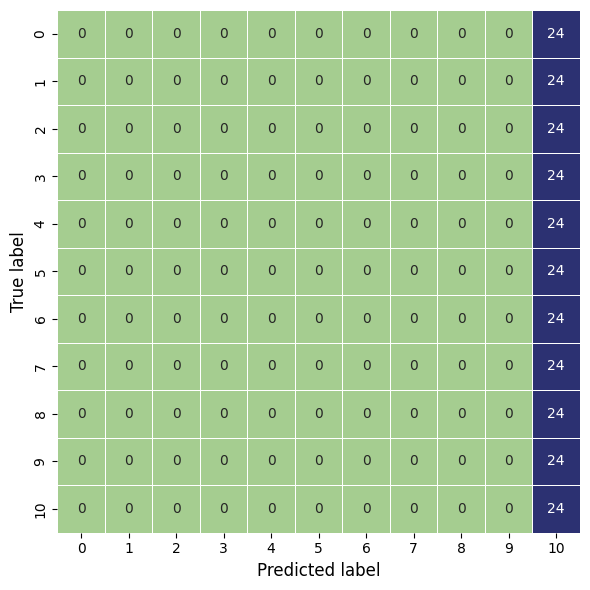

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = ['Times New Roman']

# Initialize lists for predicted labels and ground truth labels
predicted_labels = []
ground_truth_labels = []

# Iterate through the test dataset and collect predictions and ground truth labels
for images, labels in test_loader:
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)
    predicted_labels.extend(predictions.tolist())
    ground_truth_labels.extend(labels.tolist())

# Convert lists to numpy arrays
predicted_labels = np.array(predicted_labels)
ground_truth_labels = np.array(ground_truth_labels)

# Compute the confusion matrix
cm = confusion_matrix(ground_truth_labels, predicted_labels)

# Define class labels
class_labels = [str(i) for i in range(11)]

# Set a custom color palette
cmap = sns.color_palette("Blues")

# Plot the confusion matrix with a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="crest", linewidths=0.5, cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)


# plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()